In [1]:
# Import libraries for understand the dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset 
path = r"G:\Github-2025\customer_churn_ML_ANN\data_set\imbalance_df.csv"
df = pd.read_csv(path)
df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Split the Dataset
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

numeric_features = ['TotalCharges','MonthlyCharges']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ]
    )

In [5]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5274, 24)
Shape of X_test: (1758, 24)
Shape of y_train: (5274,)
Shape of y_test: (1758,)


In [6]:
import tensorflow as tf
from tensorflow import keras

un_model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

un_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = un_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy to check for overfitting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




Epoch 1/100


ValueError: in user code:

    File "c:\Users\mdutp\anaconda3\envs\deep\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\mdutp\anaconda3\envs\deep\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\mdutp\anaconda3\envs\deep\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\mdutp\anaconda3\envs\deep\lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\mdutp\anaconda3\envs\deep\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\mdutp\anaconda3\envs\deep\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 23), found shape=(None, 24)


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Make Predictions
y_pred = un_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding for binary classification

# Step 2: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 3: Report Metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

55/55 [==============================] - 0s 630us/step
Accuracy: 0.7929465301478953
Confusion Matrix:
 [[1163  137]
 [ 227  231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.63      0.50      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.63      0.50      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.79      1758



      Actual  Predicted
2476       0      False
6773       0      False
6116       1       True
3047       0      False
4092       0      False


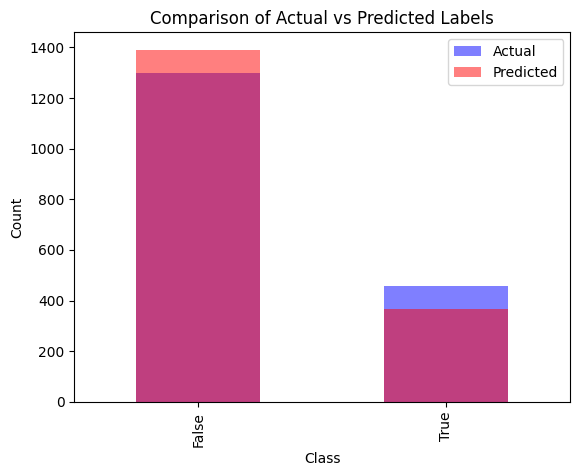

Accuracy: 0.7929465301478953
Precision: 0.6277173913043478
Recall: 0.5043668122270742
F1 Score: 0.559322033898305


In [ ]:
# Step 1: Convert predictions and actual labels into a DataFrame for easier comparison
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Step 2: Display the first few rows of the comparison DataFrame
print(comparison_df.head())

# Step 3: Visualize comparison
# For example, you can plot a bar chart to compare the counts of actual and predicted labels
import matplotlib.pyplot as plt

comparison_df['Actual'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Actual')
comparison_df['Predicted'].value_counts().plot(kind='bar', color='red', alpha=0.5, label='Predicted')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual vs Predicted Labels')
plt.legend()
plt.show()

# Step 4: Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Method 1: Undersampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Split the Dataset
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 2: Undersampling with RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [ ]:
y_resampled.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 1.2934 - accuracy: 0.4941 - val_loss: 1.2584 - val_accuracy: 0.5872
Epoch 2/100
88/88 [==============================] - 0s 1ms/step - loss: 0.9555 - accuracy: 0.5983 - val_loss: 0.6255 - val_accuracy: 0.6503
Epoch 3/100
88/88 [==============================] - 0s 1ms/step - loss: 0.7726 - accuracy: 0.6625 - val_loss: 0.7175 - val_accuracy: 0.6877
Epoch 4/100
88/88 [==============================] - 0s 1ms/step - loss: 0.7771 - accuracy: 0.6607 - val_loss: 0.5709 - val_accuracy: 0.7166
Epoch 5/100
88/88 [==============================] - 0s 1ms/step - loss: 0.7910 - accuracy: 0.6761 - val_loss: 0.7595 - val_accuracy: 0.7070
Epoch 6/100
88/88 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.6960 - val_loss: 0.5906 - val_accuracy: 0.7390
Epoch 7/100
88/88 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.7032 - val_loss: 0.6549 - val_accuracy: 0.7390
Epoch 8/100
8

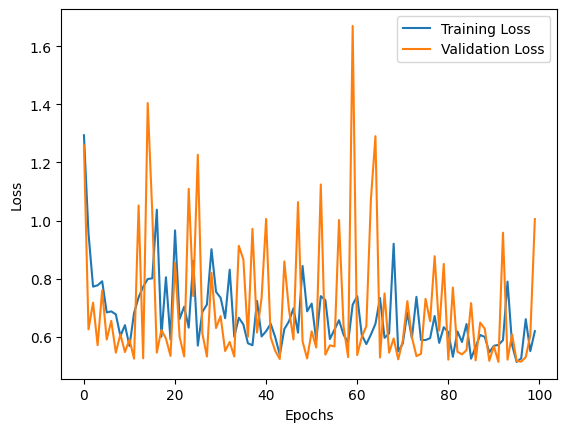

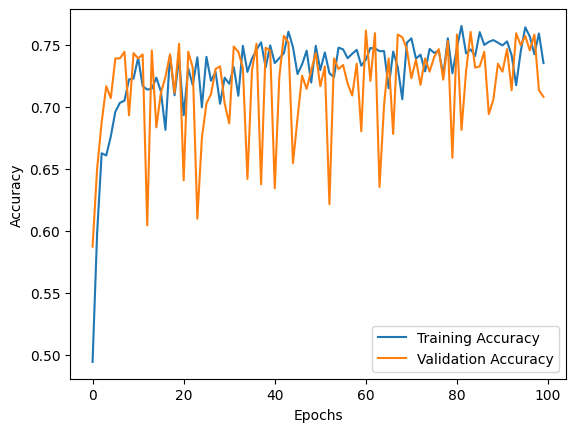

In [ ]:
und_model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

und_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = und_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy to check for overfitting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Make Predictions
y_pred = und_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding for binary classification

# Step 2: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 3: Report Metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

30/30 [==============================] - 0s 655us/step
Accuracy: 0.7080213903743315
Confusion Matrix:
 [[421  61]
 [212 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.87      0.76       482
           1       0.80      0.53      0.64       453

    accuracy                           0.71       935
   macro avg       0.73      0.70      0.70       935
weighted avg       0.73      0.71      0.70       935



      Actual  Predicted
5144       0      False
6485       0      False
4130       0      False
654        0       True
6131       0      False


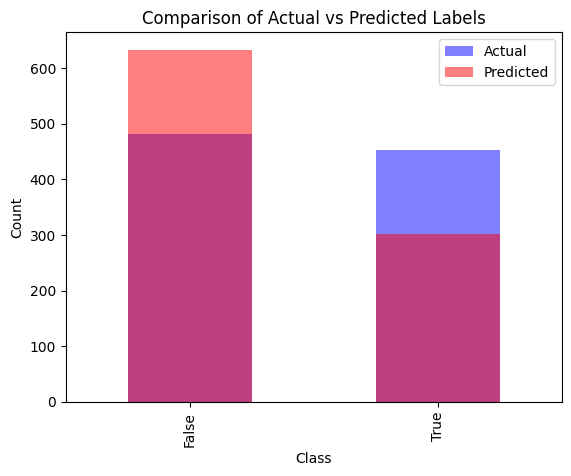

Accuracy: 0.7080213903743315
Precision: 0.7980132450331126
Recall: 0.5320088300220751
F1 Score: 0.6384105960264901


In [ ]:
# Step 1: Convert predictions and actual labels into a DataFrame for easier comparison
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Step 2: Display the first few rows of the comparison DataFrame
print(comparison_df.head())

# Step 3: Visualize comparison
# For example, you can plot a bar chart to compare the counts of actual and predicted labels
import matplotlib.pyplot as plt

comparison_df['Actual'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Actual')
comparison_df['Predicted'].value_counts().plot(kind='bar', color='red', alpha=0.5, label='Predicted')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual vs Predicted Labels')
plt.legend()
plt.show()

# Step 4: Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Method2: Oversampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Split the Dataset
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 2: Oversampling with RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Step 3: Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [ ]:
y_resampled.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    3885
0    3859
Name: count, dtype: int64

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 7.9732 - accuracy: 0.5841 - val_loss: 0.5917 - val_accuracy: 0.7091
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9770 - accuracy: 0.6665 - val_loss: 0.7965 - val_accuracy: 0.6177
Epoch 3/100
242/242 [==============================] - 0s 971us/step - loss: 1.2085 - accuracy: 0.6769 - val_loss: 1.4636 - val_accuracy: 0.6967
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1610 - accuracy: 0.6857 - val_loss: 0.5644 - val_accuracy: 0.7564
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1119 - accuracy: 0.6967 - val_loss: 1.1100 - val_accuracy: 0.7169
Epoch 6/100
242/242 [==============================] - 0s 925us/step - loss: 1.1564 - accuracy: 0.7057 - val_loss: 1.9922 - val_accuracy: 0.5902
Epoch 7/100
242/242 [==============================] - 0s 929us/step - loss: 1.0458 - accuracy: 0.7120 - val_loss: 0.5370 - val_accuracy: 

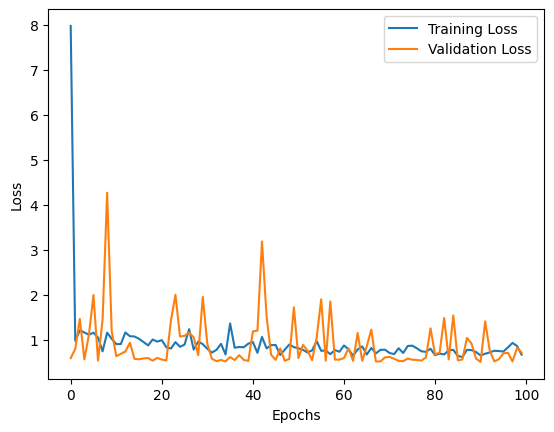

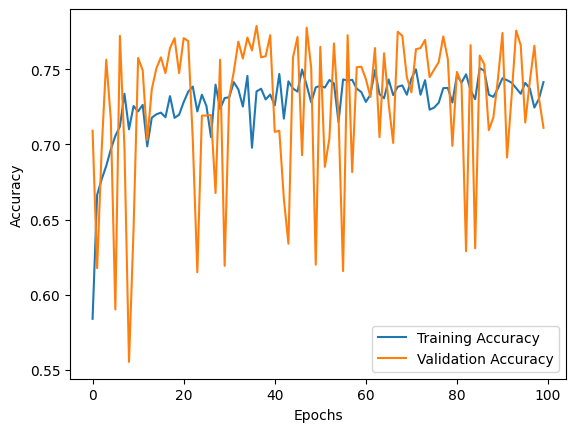

In [ ]:
ov_model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

ov_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = ov_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy to check for overfitting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Make Predictions
y_pred = ov_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding for binary classification

# Step 2: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 3: Report Metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

81/81 [==============================] - 0s 563us/step
Accuracy: 0.7110766847405112
Confusion Matrix:
 [[ 632  672]
 [  74 1204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.48      0.63      1304
           1       0.64      0.94      0.76      1278

    accuracy                           0.71      2582
   macro avg       0.77      0.71      0.70      2582
weighted avg       0.77      0.71      0.70      2582



      Actual  Predicted
4139       1       True
1692       0      False
2692       0      False
7704       1       True
321        0      False


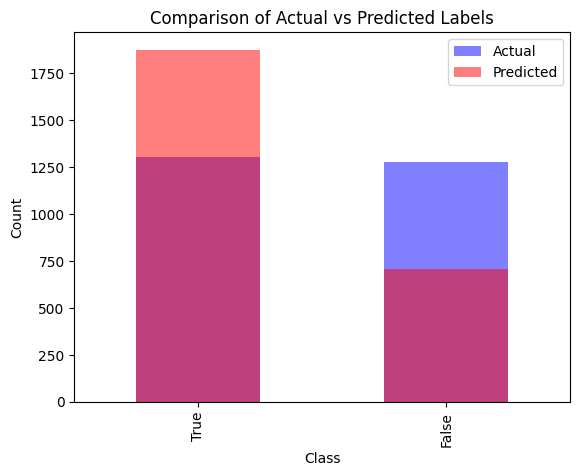

Accuracy: 0.7110766847405112
Precision: 0.6417910447761194
Recall: 0.9420970266040689
F1 Score: 0.7634749524413443


In [ ]:
# Step 1: Convert predictions and actual labels into a DataFrame for easier comparison
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Step 2: Display the first few rows of the comparison DataFrame
print(comparison_df.head())

# Step 3: Visualize comparison
# For example, you can plot a bar chart to compare the counts of actual and predicted labels
import matplotlib.pyplot as plt

comparison_df['Actual'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Actual')
comparison_df['Predicted'].value_counts().plot(kind='bar', color='red', alpha=0.5, label='Predicted')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual vs Predicted Labels')
plt.legend()
plt.show()

# Step 4: Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Method3: SMOTE

In [ ]:
from sklearn.model_selection import train_test_split

# Now, you can proceed with SMOTE
X = df.drop('Churn', axis=1)
y = df['Churn']

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [ ]:
y_sm.value_counts()


Churn
0    5163
1    5163
Name: count, dtype: int64

In [ ]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    3885
0    3859
Name: count, dtype: int64

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8285 - accuracy: 0.6148 - val_loss: 0.6174 - val_accuracy: 0.7502
Epoch 2/100
242/242 [==============================] - 0s 1000us/step - loss: 0.6826 - accuracy: 0.6876 - val_loss: 0.6852 - val_accuracy: 0.7060
Epoch 3/100
242/242 [==============================] - 0s 946us/step - loss: 0.6453 - accuracy: 0.7199 - val_loss: 1.1042 - val_accuracy: 0.6770
Epoch 4/100
242/242 [==============================] - 0s 957us/step - loss: 0.6002 - accuracy: 0.7373 - val_loss: 0.5867 - val_accuracy: 0.7188
Epoch 5/100
242/242 [==============================] - 0s 946us/step - loss: 0.5365 - accuracy: 0.7599 - val_loss: 0.6257 - val_accuracy: 0.7064
Epoch 6/100
242/242 [==============================] - 0s 942us/step - loss: 0.6069 - accuracy: 0.7513 - val_loss: 0.4769 - val_accuracy: 0.8067
Epoch 7/100
242/242 [==============================] - 0s 950us/step - loss: 0.5152 - accuracy: 0.7783 - val_loss: 0.7918 - val_acc

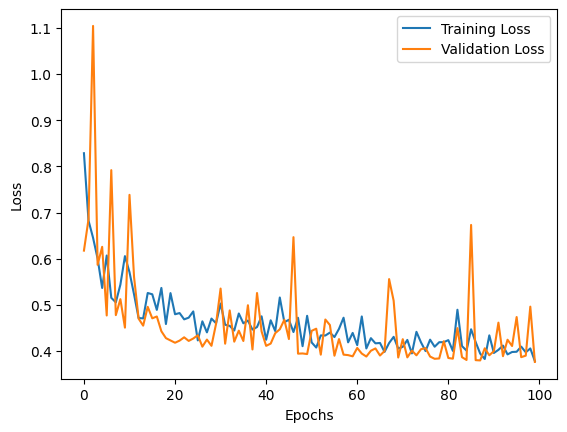

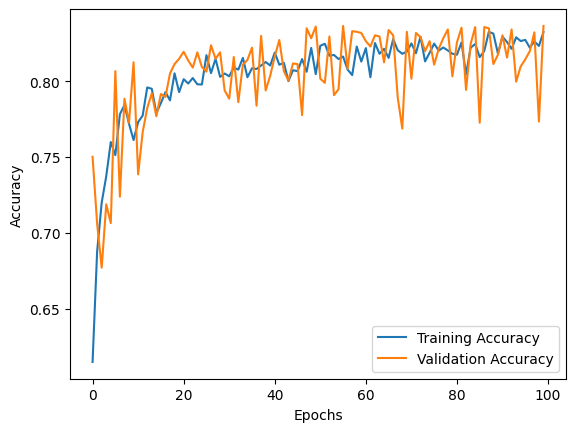

In [ ]:
sm_model = keras.Sequential([
    keras.layers.Dense(23, input_shape=(23,), activation='relu'),
    keras.layers.Dense(17, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

sm_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = sm_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy to check for overfitting
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Make Predictions
y_pred = sm_model.predict(X_test)
y_pred = (y_pred > 0.5)  # Thresholding for binary classification

# Step 2: Calculate Metrics
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 3: Report Metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

81/81 [==============================] - 0s 613us/step
Accuracy: 0.836560805577072
Confusion Matrix:
 [[1052  252]
 [ 170 1108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      1304
           1       0.81      0.87      0.84      1278

    accuracy                           0.84      2582
   macro avg       0.84      0.84      0.84      2582
weighted avg       0.84      0.84      0.84      2582



      Actual  Predicted
4139       1       True
1692       0      False
2692       0      False
7704       1       True
321        0      False


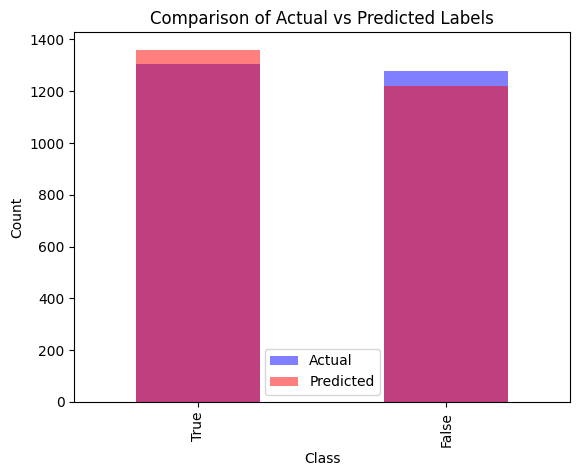

Accuracy: 0.836560805577072
Precision: 0.8147058823529412
Recall: 0.86697965571205
F1 Score: 0.8400303260045489


In [ ]:
# Step 1: Convert predictions and actual labels into a DataFrame for easier comparison
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Step 2: Display the first few rows of the comparison DataFrame
print(comparison_df.head())

# Step 3: Visualize comparison
# For example, you can plot a bar chart to compare the counts of actual and predicted labels
import matplotlib.pyplot as plt

comparison_df['Actual'].value_counts().plot(kind='bar', color='blue', alpha=0.5, label='Actual')
comparison_df['Predicted'].value_counts().plot(kind='bar', color='red', alpha=0.5, label='Predicted')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison of Actual vs Predicted Labels')
plt.legend()
plt.show()

# Step 4: Calculate performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint callback
checkpoint = ModelCheckpoint(filepath='best_model.h5', 
                              monitor='val_accuracy', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='max')

# Compile the model
sm_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model with the checkpoint callback
history = sm_model.fit(X_train, y_train, 
                       epochs=100, 
                       validation_data=(X_test, y_test),
                       callbacks=[checkpoint])

# Load the best model
best_model = keras.models.load_model('best_model.h5')

Epoch 1/100
201/242 [=======================>......] - ETA: 0s - loss: 0.4374 - accuracy: 0.8159
Epoch 1: val_accuracy improved from -inf to 0.81836, saving model to best_model.h5
242/242 [==============================] - 1s 1ms/step - loss: 0.4351 - accuracy: 0.8168 - val_loss: 0.3912 - val_accuracy: 0.8184
Epoch 2/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4236 - accuracy: 0.8167
Epoch 2: val_accuracy improved from 0.81836 to 0.83695, saving model to best_model.h5
242/242 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8181 - val_loss: 0.3733 - val_accuracy: 0.8369
Epoch 3/100
209/242 [========================>.....] - ETA: 0s - loss: 0.4502 - accuracy: 0.8126
Epoch 3: val_accuracy did not improve from 0.83695
242/242 [==============================] - 0s 992us/step - loss: 0.4511 - accuracy: 0.8131 - val_loss: 0.4742 - val_accuracy: 0.8125
Epoch 4/100
202/242 [========================>.....] - ETA: 0s - loss: 0.4024 - accuracy: 0.82

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the best model
best_model = keras.models.load_model('best_model.h5')

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Threshold the predictions for binary classification
y_pred_binary = (y_pred > 0.5)

# Print the first few predictions
print("Predictions:\n", y_pred_binary[:5])

# Evaluate the predictions using accuracy, confusion matrix, etc.
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", cm)

81/81 [==============================] - 0s 588us/step
Predictions:
 [[ True]
 [False]
 [False]
 [ True]
 [False]]
Accuracy: 0.8439194422927963
Confusion Matrix:
 [[1098  206]
 [ 197 1081]]
